In [22]:
from autots import AutoTS
import pandas as pd
import numpy as np

# 生成伪造数据
date_range = pd.date_range(start='2022-01-01', periods=200, freq='H')  # 生成100小时的时间戳
# requests为1-200
requests = np.arange(1, 201)

data = pd.DataFrame({'timestamp': date_range, 'requests': requests})  # 创建数据框
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# 加载数据
# data = pd.read_csv('data.csv')
# data.columns = ['timestamp', 'requests']
# data['timestamp'] = pd.to_datetime(data['timestamp'])
# data.set_index('timestamp', inplace=True)

# 初始化 AutoTS 模型，仅使用 ARIMA
model = AutoTS(
    forecast_length=5,             # 设置预测的长度为 60 个时间单位
    frequency='infer',              # 自动检测数据频率
    ensemble=None,                  # 不使用集成模型
    model_list=['ARIMA'],           # 指定只使用 ARIMA 模型
    transformer_list=None,        # 不使用数据转换器
    verbose=False,                   # 关闭输出
    num_validations=1               # 设置验证数量为1
)

# 训练模型
model = model.fit(data)

# 生成预测
prediction = model.predict()
forecast = prediction.forecast

# 输出结果
print("预测结果：")
print(forecast)


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'akima', 'transformations': {'0': 'ClipOutliers', '1': 'Detrend', '2': 'AlignLastDiff', '3': 'AlignLastValue'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}}, '2': {'rows': None, 'displacement_rows': 1, 'quantile': 0.9, 'decay_span': 90}, '3': {'rows': 1, 'lag': 28, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}}}. fail_on_forecast_nan=True") in model 2 in generation 0: ARIMA
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 3 in generation 0: ARIMA
Template Ev

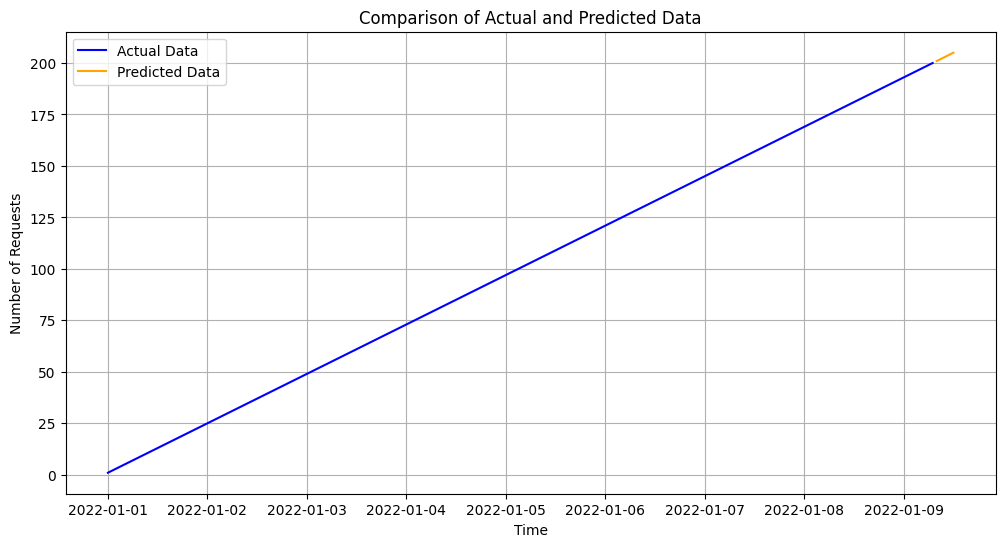

In [23]:
import matplotlib.pyplot as plt

# 生成预测
prediction = model.predict()
forecast = prediction.forecast

# 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['requests'], label='Actual Data', color='blue')  # 绘制实际数据
plt.plot(forecast.index, forecast.values, label='Predicted Data', color='orange')  # 绘制预测数据
plt.title('Comparison of Actual and Predicted Data')
plt.xlabel('Time')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid()
plt.show()

In [24]:
# 查看模型信息
print("模型信息：")
print(model)


模型信息：
Initiated AutoTS object with best model: 
ARIMA
{'fillna': 'fake_date', 'transformations': {'0': 'DifferencedTransformer', '1': 'SeasonalDifference', '2': 'DifferencedTransformer', '3': 'MaxAbsScaler'}, 'transformation_params': {'0': {'lag': 1, 'fill': 'bfill'}, '1': {'lag_1': 7, 'method': 'Mean'}, '2': {'lag': 1, 'fill': 'bfill'}, '3': {}}}
{'p': 0, 'd': 1, 'q': 5, 'regression_type': None}
Validation: 0, 1
SMAPE: 0.0, 0.0
MAE: 0.0, 0.0
SPL: 6.798890696018133e-06, 6.55140908179419e-06


In [25]:
# 生成预测
# 如果您希望使用训练好的模型进行预测，可以直接调用 predict() 方法
prediction = model.predict()  # 使用训练好的模型进行预测
forecast = prediction.forecast  # 获取预测结果

# 输出结果
print("预测结果：")
print(forecast)

# 如果您有新的数据并希望对其进行预测，可以使用以下方式
new_timestamps = pd.date_range(start='2022-01-01', periods=5, freq='H')  # 生成5个小时的时间戳
new_requests = np.arange(201, 206)  # 生成201-205的请求
new_data = pd.DataFrame({'timestamp': new_timestamps, 'requests': new_requests})
new_data['timestamp'] = pd.to_datetime(new_data['timestamp'])
new_data.set_index('timestamp', inplace=True)

prediction = model.predict(forecast_length=5, df=new_data)  # 预测未来5个时间单位
print("未来预测结果：")
print(prediction.forecast)

预测结果：
                     requests
2022-01-09 08:00:00     201.0
2022-01-09 09:00:00     202.0
2022-01-09 10:00:00     203.0
2022-01-09 11:00:00     204.0
2022-01-09 12:00:00     205.0
Too many training validations for length of data provided, decreasing num_validations to -1
未来预测结果：
                     requests
2022-01-01 05:00:00     206.0
2022-01-01 06:00:00     207.0
2022-01-01 07:00:00     208.0
2022-01-01 08:00:00     209.0
2022-01-01 09:00:00     210.0
